**(1) 데이터 가져오기**

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- age age in years  
- sex  
- bmi body mass index  : bmi는 단순 키, 몸무게로만 측정됨 > 근육량 등 배제되는게 많아서 의료적 가치가 상대적으로 낮음
- bp average blood pressure  
- s1 tc, total serum cholesterol  
- s2 ldl, low-density lipoproteins  
- s3 hdl, high-density lipoproteins  
- s4 tch, total cholesterol / HDL  
- s5 ltg, possibly log of serum triglycerides level  
- s6 glu, blood sugar level

In [ ]:
import pandas as pd

df = pd.DataFrame(diabetes['data'], index=diabetes['target'], columns=diabetes['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
df_X_drop_bmi = df.drop('bmi', axis=1)
df_X_drop_bmi = np.array(df_X_drop_bmi)

**(2, 3) 모델에 입력할 데이터 X, y 준비하기**

In [ ]:
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [ ]:
print(df_X_drop_bmi.shape)

(442, 9)


**(4) train, test 분리하기**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)


**(5) 모델 준비하기**

In [ ]:
# w, b 준비
import numpy as np
w = np.random.rand(10)
b = np.random.rand()
print('w : ', w)
print('b : ', b)

def model(X, w, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * w[i]
    predictions += b
    return predictions

w :  [0.60516793 0.45968611 0.29737505 0.37989731 0.22155082 0.17387069
 0.12498341 0.62318211 0.02458004 0.95102092]
b :  0.6937551075101428


**(6) 손실함수 loss 정의하기**

In [ ]:
def MSE(x, y):
  mse = ((x - y)**2).mean()
  return mse

def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L

**(7) gradient 함수 구현하기**

In [ ]:
def gradient(X, w, b, y):
  n = len(y)
  y_pred = model(X, w, b)
  dw = 1/n * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dw, db

**(8, 9) learning rate 설정하고 모델 학습하기**

In [ ]:
learning_rate = 0.0001
losses = []

for i in range(1, 1001):
  dw, db = gradient(X_train, w, b, y_train)
  w -= learning_rate * dw
  b -= learning_rate * db
  L = loss(X_train, w, b, y_train)
  losses.append(L)
  if i % 100 == 0:
    print('Iteration {} : Loss {}'.format(i, L))

Iteration 100 : Loss 28578.771907938197
Iteration 200 : Loss 27696.286265850067
Iteration 300 : Loss 26848.406061182755
Iteration 400 : Loss 26033.77425961078
Iteration 500 : Loss 25251.08704221032
Iteration 600 : Loss 24499.09171864463
Iteration 700 : Loss 23776.584722182884
Iteration 800 : Loss 23082.409683343238
Iteration 900 : Loss 22415.4555790771
Iteration 1000 : Loss 21774.654954532067


In [ ]:
# bmi 제외하고 모델 돌려보기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_drop_bmi, df_y, test_size=0.2, random_state=42)

# w, b 준비
import numpy as np
w = np.random.rand(9)
b = np.random.rand()
print('w : ', w)
print('b : ', b)

def model(X, w, b):
  predictions = 0
  for i in range(9):
    predictions += X[:, i] * w[i]
    predictions += b
    return predictions


learning_rate = 0.0001
losses = []

for i in range(1, 1001):
  dw, db = gradient(X_train, w, b, y_train)
  w -= learning_rate * dw
  b -= learning_rate * db
  L = loss(X_train, w, b, y_train)
  losses.append(L)
  if i % 100 == 0:
    print('Iteration {} : Loss {}'.format(i, L))

w :  [0.18438626 0.35265791 0.594834   0.71570205 0.30778945 0.46761179
 0.20703421 0.8170797  0.7436803 ]
b :  0.8588134289574243
Iteration 100 : Loss 28531.121521469402
Iteration 200 : Loss 27650.527771187255
Iteration 300 : Loss 26804.465266768195
Iteration 400 : Loss 25991.57988327061
Iteration 500 : Loss 25210.57059706457
Iteration 600 : Loss 24460.18740349119
Iteration 700 : Loss 23739.229316180033
Iteration 800 : Loss 23046.54244482217
Iteration 900 : Loss 22381.018148322397
Iteration 1000 : Loss 21741.591260374644


-> bmi 줄인게 loss가 더 작게나와서 아래걸로 진행

**(10) test 데이터에 대한 성능 확인**

In [ ]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

19034.542078367776

**(11) 정답 데이터와 예측 데이터 시각화**

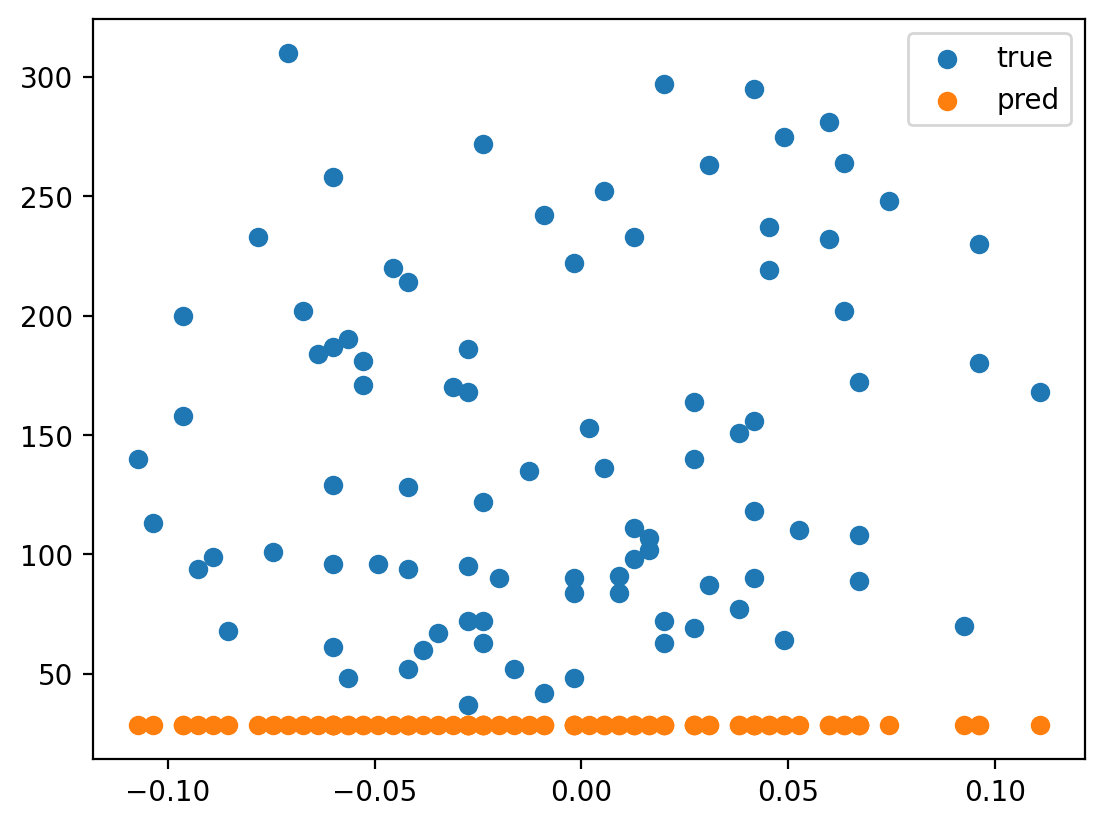

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()